# Enunciado projeto 03

O objetivo deste projeto é construir um modelo preditivo capaz de calcular o preço de um imóvel no bairro Vila Nova Conceição na cidade de São Paulo. 

Para completar este projeto cada aluno deverá seguir as orientações que estão neste notebook e preencher as células vazias. 

Este projeto é individual. O link do notebook totalmente preenchido deverá ser submetido no black até o dia 30/10/2019.

# Aquisição, pré-processamento e análise descritiva

In [1]:
import pandas as pd
import io
import requests
url="https://media.githubusercontent.com/media/fbarth/ml-espm/master/data/20140917_imoveis_filtrados_final.csv_shaped.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")

In [2]:
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
0,vila-nova-conceicao,490000.0,32.0,1.0,1.0,1.0,1.0
1,vila-nova-conceicao,3180000.0,157.0,2.0,2.0,2.0,2.0
2,vila-nova-conceicao,1900000.0,205.0,2.0,3.0,3.0,3.0
3,vila-nova-conceicao,3565000.0,193.0,3.0,3.0,3.0,3.0
4,vila-nova-conceicao,1605000.0,116.0,1.0,3.0,2.0,2.0


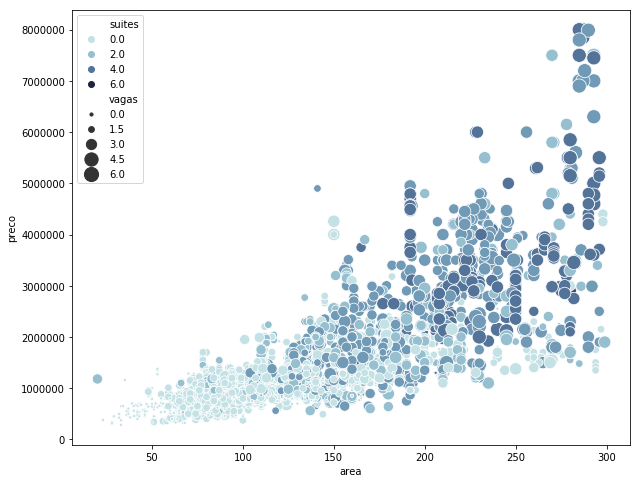

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

In [4]:
df['bairro'].value_counts()

vila-mariana           1714
paraiso                 809
vila-nova-conceicao     794
vila-sonia              314
perto_ibirapuera        129
Name: bairro, dtype: int64

* Considere apenas os imóveis do bairo vila-nova-conceicao

In [5]:
# @hidden_cell
df = df[df['bairro'] == 'vila-nova-conceicao']

* Depois de considerar apenas os imóveis do bairro vila-nova-conceicao o tamanho do dataset precisa ser exatamente igual a: 

In [6]:
df.shape

(794, 7)

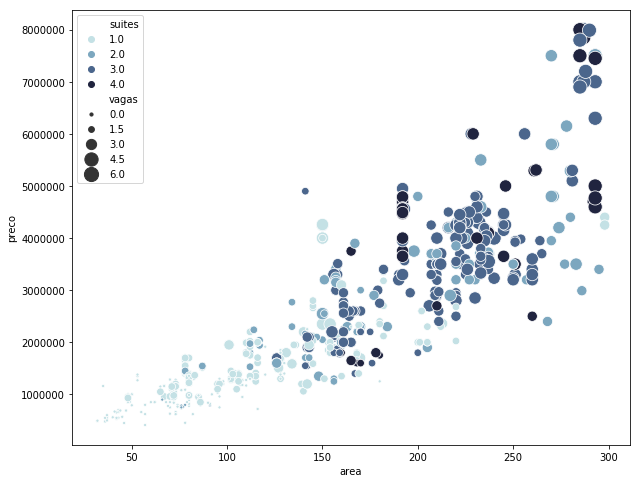

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

In [8]:
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
0,vila-nova-conceicao,490000.0,32.0,1.0,1.0,1.0,1.0
1,vila-nova-conceicao,3180000.0,157.0,2.0,2.0,2.0,2.0
2,vila-nova-conceicao,1900000.0,205.0,2.0,3.0,3.0,3.0
3,vila-nova-conceicao,3565000.0,193.0,3.0,3.0,3.0,3.0
4,vila-nova-conceicao,1605000.0,116.0,1.0,3.0,2.0,2.0


* A quantidade suites não pode ser maior que a quantidade de dormitórios e a quantidade de suites também não pode ser maior que a quantidade de banheiros. Exclua todos os exemplos que não satisfazem esta restrição. Estes exemplos provavelmente são erros de coleta de dados.

In [9]:
# @hidden_cell
df = df[df['suites'] <= df['dormitorios']]
df = df[df['suites'] <= df['banheiros']]

* Depois deste filtro o dataset precisa ter o tamanho abaixo: 

In [10]:
df.shape

(772, 7)

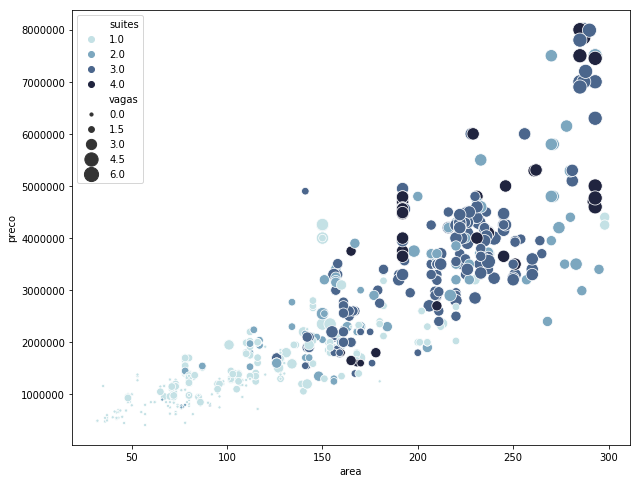

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

* Visto que agora a variável bairro tem apenas um valor, você deve remover a mesma

In [12]:
# @hidden_cell
df = df.drop(columns=['bairro'])

* Depois deste filtro o dataset precisa ter a seguinte estrutura:

In [13]:
df.head()

,preco,area,suites,dormitorios,banheiros,vagas
0,490000.0,32.0,1.0,1.0,1.0,1.0
1,3180000.0,157.0,2.0,2.0,2.0,2.0
2,1900000.0,205.0,2.0,3.0,3.0,3.0
3,3565000.0,193.0,3.0,3.0,3.0,3.0
4,1605000.0,116.0,1.0,3.0,2.0,2.0


* Qual é o valor mínimo e máximo dos preços dos imóveis? 

In [14]:
# @hidden_cell
x = df['preco'].describe()
x

count    7.720000e+02
mean     2.479498e+06
std      1.507490e+06
min      4.115000e+05
25%      1.300000e+06
50%      2.000000e+06
75%      3.550000e+06
max      8.000000e+06
Name: preco, dtype: float64

## Combinando atributos
O objetivo desta etapa é criar atributos compostos a partir de atributos pré-existentes

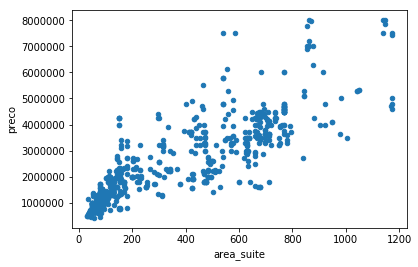

In [15]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
df['area_suite'] = df['suites'] * df['area']
df.plot(kind='scatter', x = 'area_suite', y = 'preco')

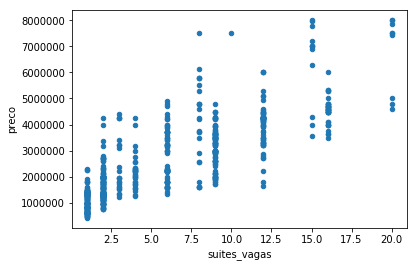

In [16]:
import matplotlib.pyplot as plt
df['suites_vagas'] = df['suites'] * df['vagas']
df.plot(kind='scatter', x = 'suites_vagas', y = 'preco')

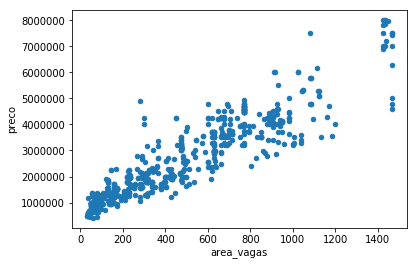

In [17]:
import matplotlib.pyplot as plt
df['area_vagas'] = df['area'] * df['vagas']
df.plot(kind='scatter', x = 'area_vagas', y = 'preco')

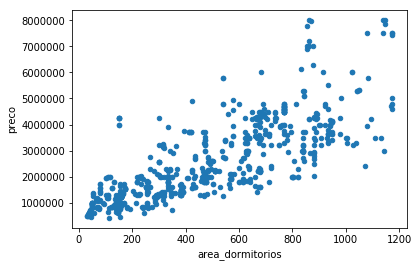

In [18]:
import matplotlib.pyplot as plt
df['area_dormitorios'] = df['area'] * df['dormitorios']
df.plot(kind='scatter', x = 'area_dormitorios', y = 'preco')

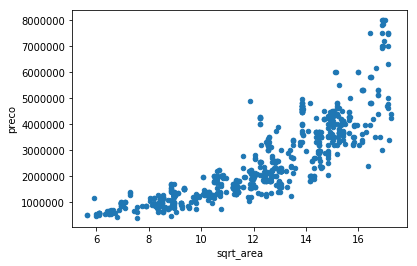

In [19]:
import numpy as np
import matplotlib.pyplot as plt
df['sqrt_area'] = np.sqrt(df['area'])
df.plot(kind='scatter', x = 'sqrt_area', y = 'preco')

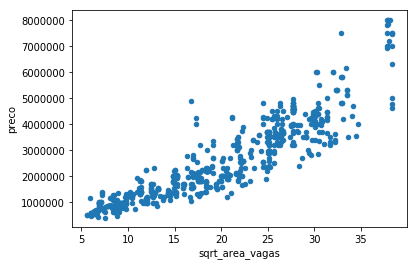

In [20]:
import numpy as np
import matplotlib.pyplot as plt
df['sqrt_area_vagas'] = np.sqrt(df['area_vagas'])
df.plot(kind='scatter', x = 'sqrt_area_vagas', y = 'preco')

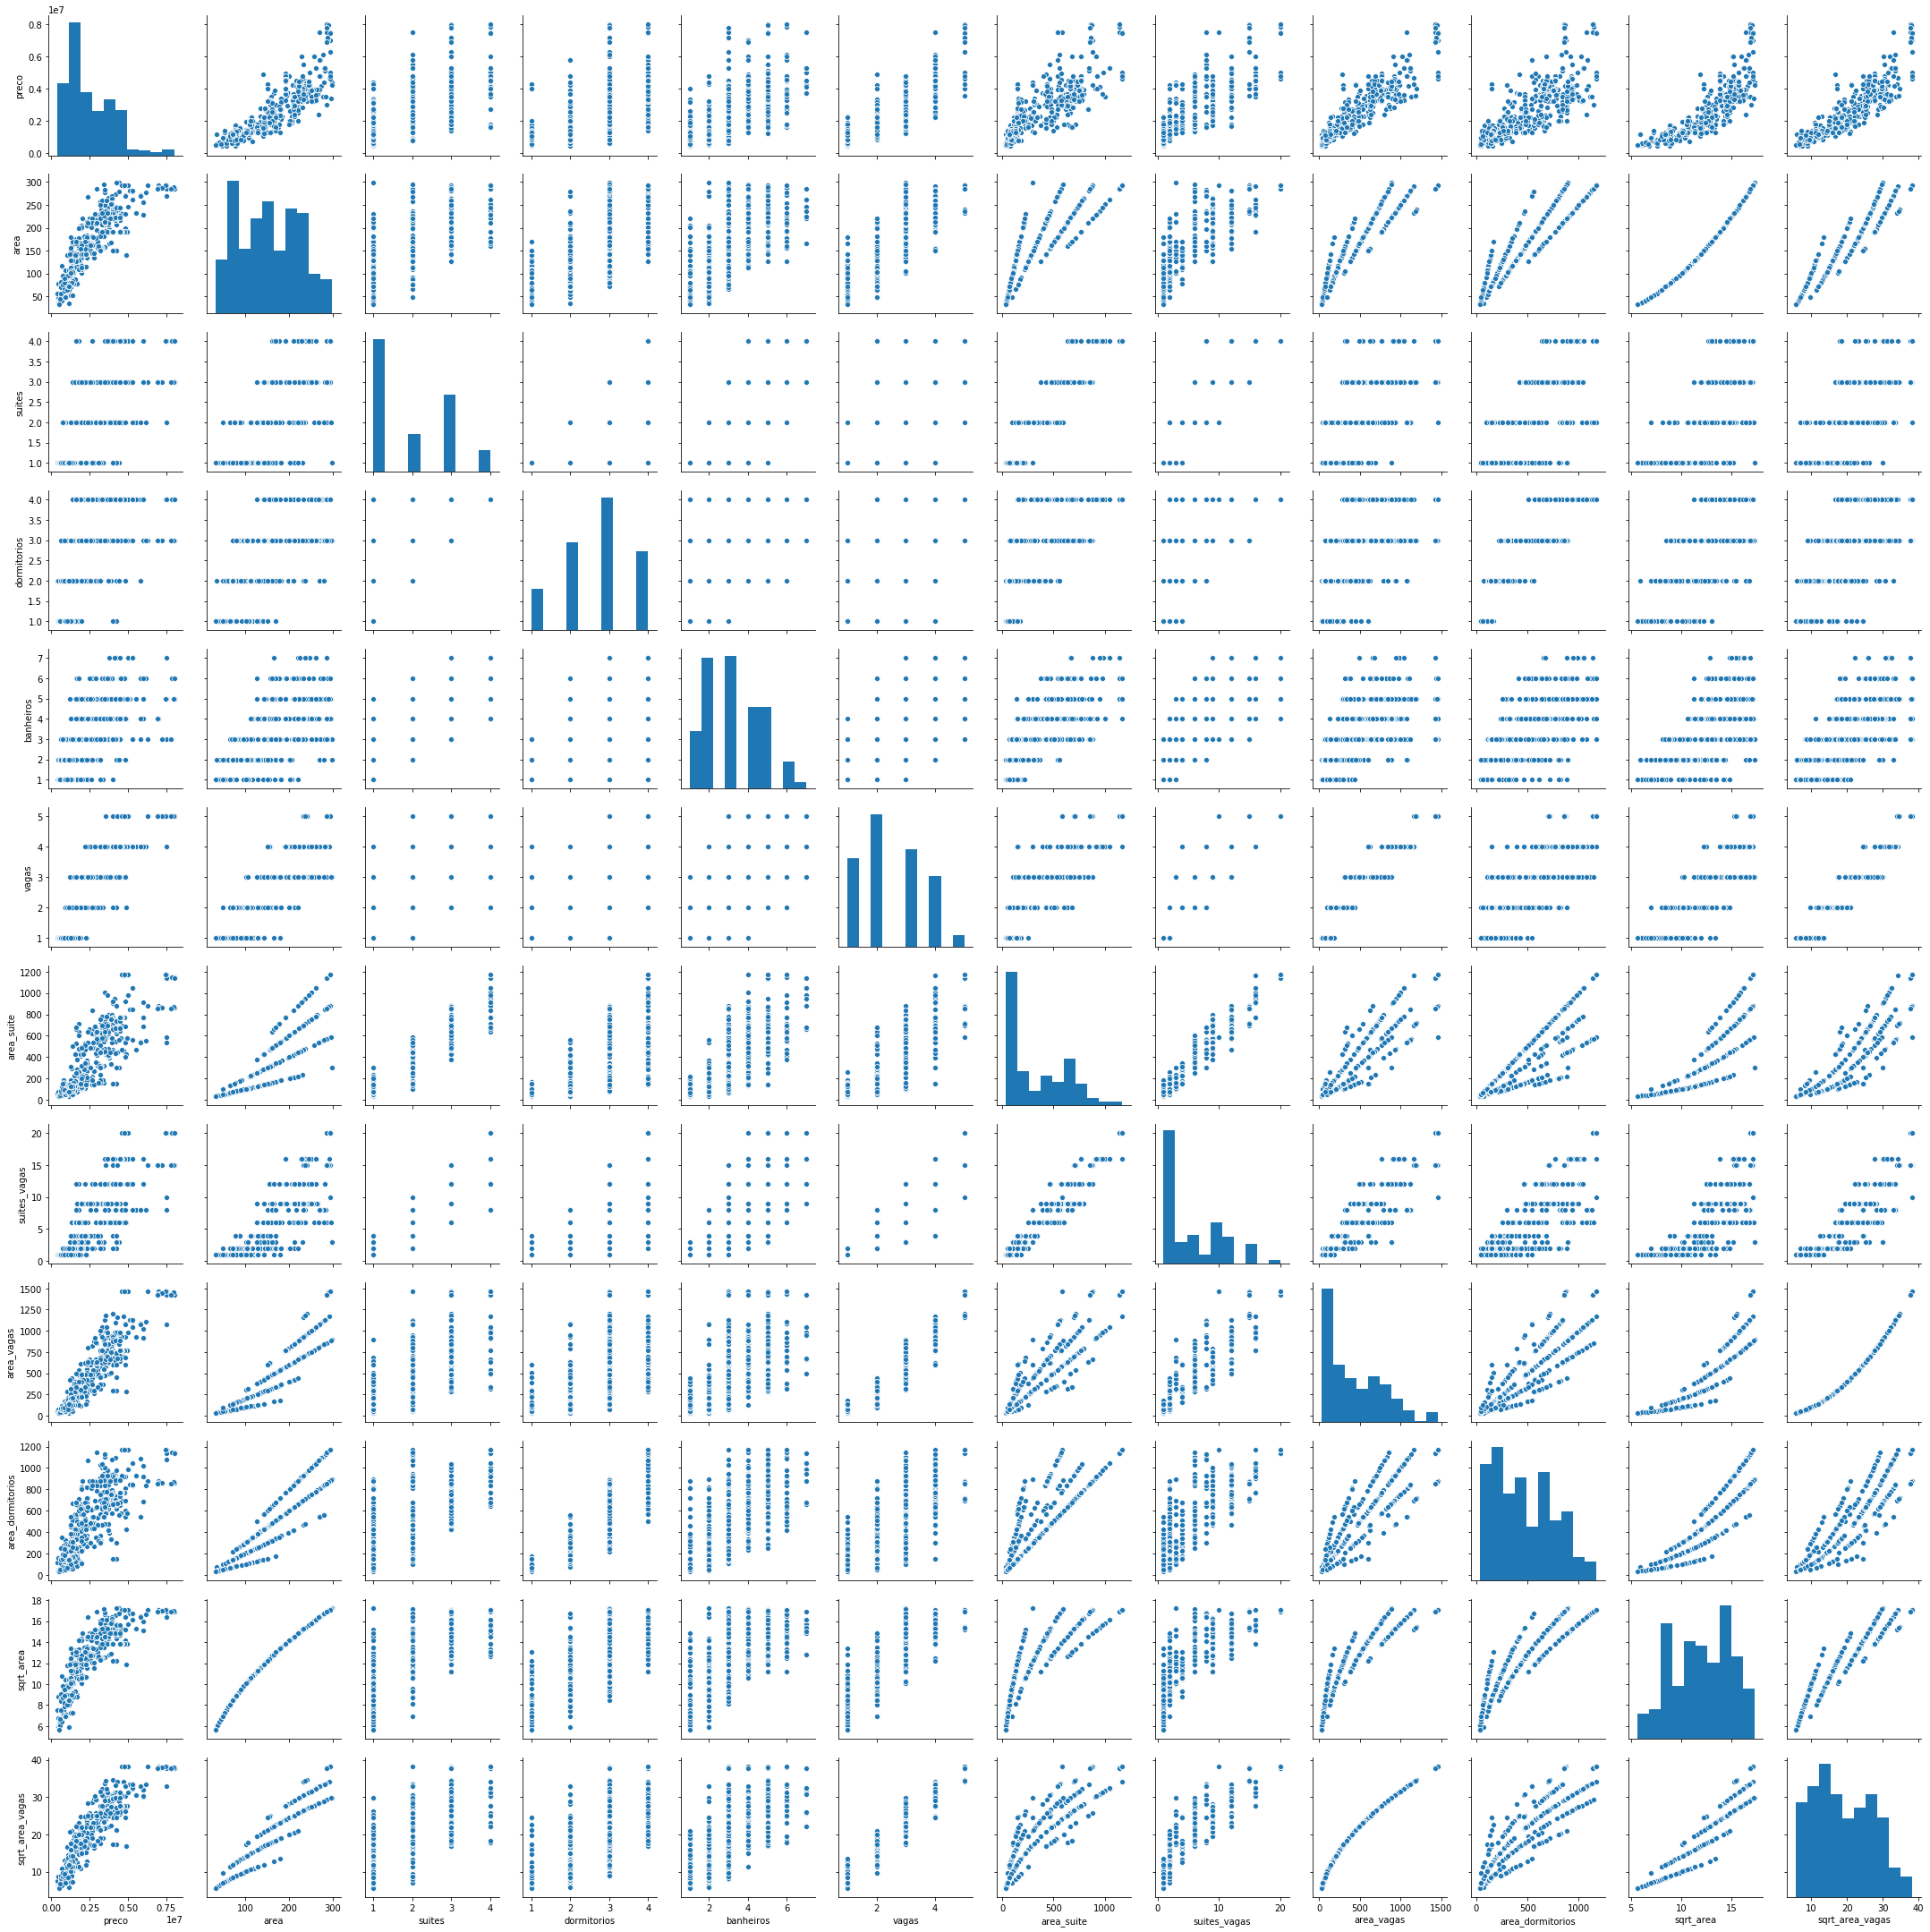

In [21]:
import seaborn as sns
sns.pairplot(df)

# Divisão dos datasets

In [22]:
df.head()

,preco,area,suites,dormitorios,banheiros,vagas,area_suite,suites_vagas,area_vagas,area_dormitorios,sqrt_area,sqrt_area_vagas
0,490000.0,32.0,1.0,1.0,1.0,1.0,32.0,1.0,32.0,32.0,5.656854,5.656854
1,3180000.0,157.0,2.0,2.0,2.0,2.0,314.0,4.0,314.0,314.0,12.529964,17.720045
2,1900000.0,205.0,2.0,3.0,3.0,3.0,410.0,6.0,615.0,615.0,14.317821,24.799194
3,3565000.0,193.0,3.0,3.0,3.0,3.0,579.0,9.0,579.0,579.0,13.892444,24.062419
4,1605000.0,116.0,1.0,3.0,2.0,2.0,116.0,2.0,232.0,348.0,10.770330,15.231546


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:12], df['preco'], test_size=0.2, random_state=4)

In [24]:
x_train.head()

,area,suites,dormitorios,banheiros,vagas,area_suite,suites_vagas,area_vagas,area_dormitorios,sqrt_area,sqrt_area_vagas
197,245.0,3.0,3.0,5.0,4.0,735.0,12.0,980.0,735.0,15.652476,31.304952
546,32.0,1.0,1.0,1.0,1.0,32.0,1.0,32.0,32.0,5.656854,5.656854
499,278.0,2.0,3.0,6.0,4.0,556.0,8.0,1112.0,834.0,16.673332,33.346664
780,233.0,3.0,4.0,4.0,3.0,699.0,9.0,699.0,932.0,15.264338,26.438608
749,161.0,3.0,3.0,5.0,3.0,483.0,9.0,483.0,483.0,12.688578,21.977261


# Criação e avaliação do modelo preditivo

Crie um modelo de regressão utilizando os algoritmos e transformações nos atributos que você considera mais adequados.

Valide o modelo desenvolvido considerando os datasets X_test e y_test. Espera-se que o erro médio absoluto seja inferior a duzentos mil reais (R$ 200.000,00). 

Descreva nas células abaixo todas as etapas necessárias para o desenvolvimento e validação do modelo.

## Regressão Linear sem transformação adicional de atributos

In [25]:
# @hidden_cell
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(617, 11)
(617,)
(155, 11)


In [26]:
# @hidden_cell
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

### Validação do modelo

In [27]:
predicted = model.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 276361120261.71857
r2 = % 0.8761072376706219
mae = % 375369.678293191


## Random Forest sem modificação adicional de atributos e modificando apenas a quantidade de árvores

In [29]:
# @hidden_cell
from sklearn.ensemble import RandomForestRegressor
results = pd.DataFrame(columns=['estimators','r2'])
for i in range(100, 2000, 100):
    clf = RandomForestRegressor(n_estimators=i, max_depth=None, random_state=4, oob_score=True)
    clf.fit(x_train, y_train)
    results = results.append({'estimators':i, 'r2': clf.oob_score_}, ignore_index=True)

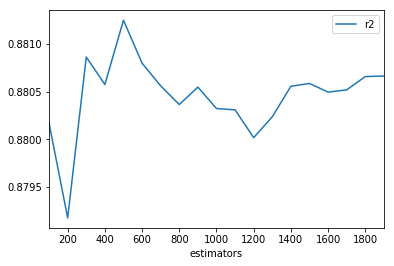

In [30]:
results.plot(x='estimators', y='r2')

In [31]:
clf = RandomForestRegressor(n_estimators=500, max_depth=None, random_state=4, oob_score=True)
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=4, verbose=0, warm_start=False)

In [32]:
print(clf.oob_score_)
print(clf.feature_importances_)
print(x_train.columns)

0.8812472515630337
[0.02803434 0.00326684 0.00466506 0.01308311 0.0021697  0.02380776
 0.00447585 0.43729787 0.02141204 0.02343372 0.4383537 ]
Index(['area', 'suites', 'dormitorios', 'banheiros', 'vagas', 'area_suite',
       'suites_vagas', 'area_vagas', 'area_dormitorios', 'sqrt_area',
       'sqrt_area_vagas'],
      dtype='object')


### Validação do modelo

In [33]:
predicted = clf.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 213179872473.77136
r2 = % 0.9044314075410174
mae = % 298457.8876353026


## Random Forest sem modificação adicional de atributos e com GridSearch

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2', 3, 4, 5, 6],
    'max_depth' : [2, 10, 20, 100, None]
}
rfc=RandomForestRegressor(random_state=4)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose=1, n_jobs=-1)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  5.7min finished


{'max_depth': 20, 'max_features': 4, 'n_estimators': 100}

In [36]:
clf2 = RandomForestRegressor(n_estimators=100, max_features = 4, max_depth=20, random_state=4, oob_score=True)
clf2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=True, random_state=4,
           verbose=0, warm_start=False)

In [37]:
print(clf2.oob_score_)
print(clf2.feature_importances_)
print(x_train.columns)

0.8795147398888915
[0.12527205 0.00403994 0.0060652  0.01327014 0.03929097 0.05625799
 0.01448844 0.3015012  0.02361553 0.10704337 0.30915517]
Index(['area', 'suites', 'dormitorios', 'banheiros', 'vagas', 'area_suite',
       'suites_vagas', 'area_vagas', 'area_dormitorios', 'sqrt_area',
       'sqrt_area_vagas'],
      dtype='object')


### Validação do modelo

In [38]:
predicted = clf2.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 214842690700.68213
r2 = % 0.9036859656959831
mae = % 295826.9615844439


## Regressão Linear com transformação polinomial

In [39]:
#Generate a new feature matrix consisting of all polynomial combinations 
#of the features with degree less than or equal to the specified degree. 
#For example, if an input sample is two dimensional and of the form [a, b], 
#the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x_train)
train_ = transformer.transform(x_train)

In [40]:
print(x_train.shape)
print(train_.shape)

(617, 11)
(617, 77)


In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(train_, y_train)

### Validação do modelo

In [42]:
transformer.fit(x_test)
test_ = transformer.transform(x_test)
predicted = model.predict(test_)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 313650312832.4712
r2 = % 0.8593904829105906
mae = % 367954.66387632623


## Random Forest com transformacao polinomial

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2', 3, 4, 5, 6],
    'max_depth' : [2, 10, 20, 100, None]
}
rfc=RandomForestRegressor(random_state=4)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose=1, n_jobs=-1)
CV_rfc.fit(train_, y_train)
CV_rfc.best_params_

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  7.0min finished


{'max_depth': 10, 'max_features': 4, 'n_estimators': 100}

In [45]:
clf3 = RandomForestRegressor(n_estimators=100, max_features = 4, max_depth=10, random_state=4, oob_score=True)
clf3.fit(train_, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=True, random_state=4,
           verbose=0, warm_start=False)

In [47]:
print(clf3.oob_score_)

0.877130063241859


### Validação do modelo

In [49]:
predicted = clf3.predict(test_)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 198392355709.94778
r2 = % 0.9110606551650213
mae = % 290960.4358867519


# Análise dos resultados

As abordagens testadas e os seus respectivos resultados são apresentados abaixo: 

| Modelos                                                | MAE        |
|--------------------------------------------------------|------------|
| Regressão linear sem transformação adicional           | 375,369.68 |
| RandomForest com 500 árvores                           | 298,457.89 |
| RandomForest com GridSearch                            | 295,826.96 |
| Regressão Linear com transformação polinomial          | 367,954.66 |
| RandomForest com GridSearch e transformação polinomial | 290,960.44 |

In [95]:
#def diff(x, y):
#    if ((x - y) >= 0):
#        return (x-y)
#    else:
#        return (x-y)*-1

def diff(x, y):
    return (x-y)
    
predicted2 = clf2.predict(x_test)
resultados = pd.DataFrame({'real': y_test,'rf_grid_polinomial': predicted, 'rf_grid': predicted2})

resultados['rf_grid_polinomial_dif'] = resultados.apply(lambda x: diff(x['real'], x['rf_grid_polinomial']), axis=1)
resultados['rf_grid_dif'] = resultados.apply(lambda x: diff(x['real'], x['rf_grid']), axis=1)

resultados = resultados.join(x_test)

resultados.head()

,real,rf_grid_polinomial,rf_grid,rf_grid_polinomial_dif,rf_grid_dif,area,suites,dormitorios,banheiros,vagas,area_suite,suites_vagas,area_vagas,area_dormitorios,sqrt_area,sqrt_area_vagas
69,8000000.0,7.359933e+06,7.530767e+06,640066.666667,469233.333333,287.0,4.0,4.0,5.0,5.0,1148.0,20.0,1435.0,1148.0,16.941074,37.881394
651,3400000.0,4.175107e+06,4.175333e+06,-775107.299196,-775333.333333,295.0,2.0,3.0,4.0,3.0,590.0,6.0,885.0,885.0,17.175564,29.748950
142,3700000.0,4.036843e+06,4.079485e+06,-336842.918741,-379485.000000,265.0,3.0,3.0,5.0,3.0,795.0,9.0,795.0,795.0,16.278821,28.195744
221,1915000.0,1.830498e+06,1.785862e+06,84502.392923,129138.333333,160.0,1.0,4.0,2.0,2.0,160.0,2.0,320.0,640.0,12.649111,17.888544
65,4250000.0,4.214860e+06,4.249772e+06,35140.070825,228.095238,222.0,3.0,3.0,5.0,4.0,666.0,12.0,888.0,666.0,14.899664,29.799329


Text(0.5, 1.0, 'Análise dos erros')

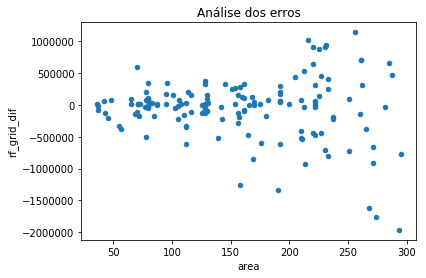

In [112]:
ax = resultados.plot(x='area', y='rf_grid_dif', kind='scatter')
ax.set_title('Análise dos erros')

Text(0.5, 1.0, 'Análise dos erros')

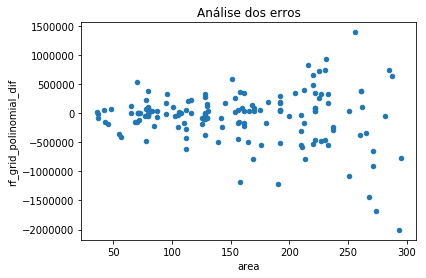

In [113]:
ax = resultados.plot(x='area', y='rf_grid_polinomial_dif', kind='scatter')
ax.set_title('Análise dos erros')